In [52]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from hashcode.utils import load
from hashcode.state import GameState
plt.style.use('ggplot')

# os.chdir('..')
state: GameState = load(5)

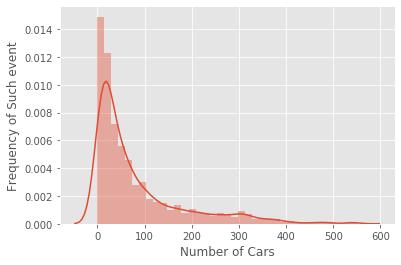

In [53]:
traffic = np.zeros(len(state.intersection_mapping))
for car in state.car_paths:
    for path in car:
        traffic[state.streets[path].end] += 1
sns.distplot(traffic)
plt.xlabel('Number of Cars')
plt.ylabel('Frequency of Such event')
plt.show()

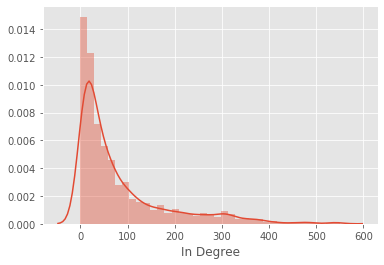

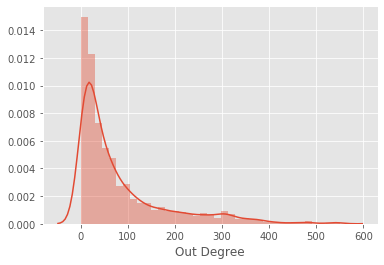

In [54]:
in_connections = np.zeros(len(state.intersection_mapping))
for car in state.car_paths:
    for path in car:
        in_connections[state.streets[path].end] += 1
sns.distplot(in_connections)
plt.xlabel('In Degree')

plt.show()
out_connections = np.zeros(len(state.intersection_mapping))
for car in state.car_paths:
    for path in car:
        out_connections[state.streets[path].start] += 1
sns.distplot(out_connections)
plt.xlabel('Out Degree')
plt.show()

Simulation Time: 1992


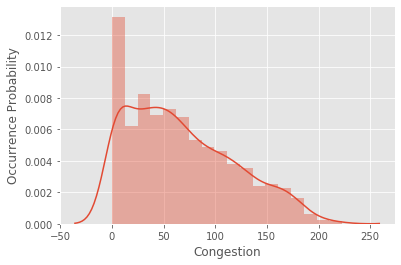

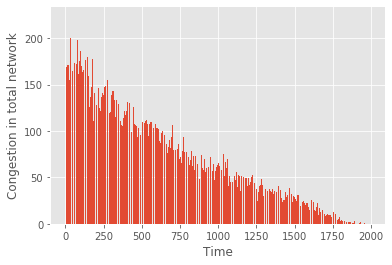

In [55]:
print("Simulation Time:", state.D)
discarded_cars = 0
hits = np.zeros(state.D)
for car in state.car_paths:
    time = 0
    for path in car[:-1]:
        time += state.streets[path].l
        if time < state.D:
            hits[time] += 1
sns.distplot(hits)
plt.xlabel('Congestion')
plt.ylabel('Occurrence Probability')
plt.show()

plt.bar(np.arange(len(hits)), hits)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()

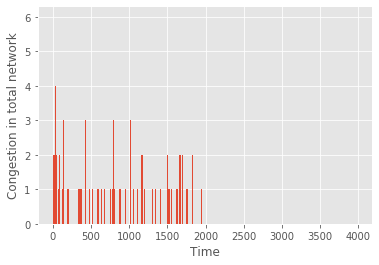

1


In [56]:
discarded_cars = 0
total_duration = np.zeros(state.D * 2)
for car in state.car_paths:
    time = 0
    for path in car:
        time += state.streets[path].l
    if time > state.D:
        discarded_cars += 1
    total_duration[time] += 1

plt.bar(np.arange(len(total_duration)), total_duration)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()
print(discarded_cars)